## Data Simulation 

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_rows = 2000

# Simulate features
data = {
    "age": np.random.randint(1, 70, n_rows),
    "sex": np.random.choice([0, 1], n_rows),  # 0 = Female, 1 = Male
    "fever": np.random.choice([0, 1], n_rows, p=[0.15, 0.85]),
    "cold": np.random.choice([0, 1], n_rows, p=[0.7, 0.3]),
    "rigor": np.random.choice([0, 1], n_rows, p=[0.6, 0.4]),
    "fatigue": np.random.choice([0, 1], n_rows, p=[0.3, 0.7]),
    "headache": np.random.choice([0, 1], n_rows, p=[0.35, 0.65]),
    "bitter_tongue": np.random.choice([0, 1], n_rows, p=[0.8, 0.2]),
    "vomiting": np.random.choice([0, 1], n_rows, p=[0.7, 0.3]),
    "diarrhea": np.random.choice([0, 1], n_rows, p=[0.85, 0.15]),
    "convulsion": np.random.choice([0, 1], n_rows, p=[0.95, 0.05]),
    "anemia": np.random.choice([0, 1], n_rows, p=[0.8, 0.2]),
    "jaundice": np.random.choice([0, 1], n_rows, p=[0.9, 0.1]),
    "cocacola_urine": np.random.choice([0, 1], n_rows, p=[0.97, 0.03]),
    "hypoglycemia": np.random.choice([0, 1], n_rows, p=[0.93, 0.07]),
    "prostration": np.random.choice([0, 1], n_rows, p=[0.92, 0.08]),
    "hyperpyrexia": np.random.choice([0, 1], n_rows, p=[0.85, 0.15]),
}

# Disease logic for multi-class (simulate some correlation)
def assign_label(row):
    malaria_score = (
        1.2 * row['fever'] +
        0.8 * row['rigor'] +
        1.1 * row['headache'] +
        0.8 * row['fatigue'] +
        0.6 * row['anemia']
    )
    typhoid_score = (
        1.1 * row['fever'] +
        0.7 * row['headache'] +
        1.2 * row['diarrhea'] +
        1.0 * row['vomiting'] +
        0.8 * row['fatigue']
    )
    
    # Thresholds for disease assignment
    if malaria_score > 3.0 and typhoid_score > 3.0:
        return 'both'
    elif malaria_score > 3.0:
        return 'malaria'
    elif typhoid_score > 3.0:
        return 'typhoid'
    else:
        return 'none'

df = pd.DataFrame(data)
df['diagnosis'] = df.apply(assign_label, axis=1)

# Save to CSV
df.to_csv('C:\\Users\\555555\\Malaria-Typhoid-ML-Diagnosis\\data\\malaria_typhoid_multiclass.csv', index=False)
print("Saved: C:\\Users\\555555\\Malaria-Typhoid-ML-Diagnosis\\data\\malaria_typhoid_multiclass.csv")

Saved: C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\malaria_typhoid_multiclass.csv


# 01 Data Collection and Exploration

## 1.1. Import Libraries and Load Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", font_scale=1.2)

In [4]:
# Load the data
df = pd.read_csv('C:\\Users\\555555\\Malaria-Typhoid-ML-Diagnosis\\data\\malaria_typhoid_multiclass.csv')
df.head()

,age,sex,fever,cold,rigor,fatigue,headache,bitter_tongue,vomiting,diarrhea,convulsion,anemia,jaundice,cocacola_urine,hypoglycemia,prostration,hyperpyrexia,diagnosis
0,52,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,both
1,15,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,none
2,61,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,both
3,21,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,none
4,24,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,malaria


## 1.2. Dataset Overview and Data Type

In [5]:
display(df.info())
display(df.describe())
display(df.isnull().sum())
display(df['diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2000 non-null   int64 
 1   sex             2000 non-null   int64 
 2   fever           2000 non-null   int64 
 3   cold            2000 non-null   int64 
 4   rigor           2000 non-null   int64 
 5   fatigue         2000 non-null   int64 
 6   headache        2000 non-null   int64 
 7   bitter_tongue   2000 non-null   int64 
 8   vomiting        2000 non-null   int64 
 9   diarrhea        2000 non-null   int64 
 10  convulsion      2000 non-null   int64 
 11  anemia          2000 non-null   int64 
 12  jaundice        2000 non-null   int64 
 13  cocacola_urine  2000 non-null   int64 
 14  hypoglycemia    2000 non-null   int64 
 15  prostration     2000 non-null   int64 
 16  hyperpyrexia    2000 non-null   int64 
 17  diagnosis       2000 non-null   object
dtypes: int64

None

,age,sex,fever,cold,rigor,fatigue,headache,bitter_tongue,vomiting,diarrhea,convulsion,anemia,jaundice,cocacola_urine,hypoglycemia,prostration,hyperpyrexia
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,34.305500,0.503500,0.843000,0.292000,0.41750,0.706500,0.653000,0.207500,0.282500,0.14350,0.046000,0.200500,0.105500,0.024000,0.072500,0.078000,0.135500
std,20.027824,0.500113,0.363892,0.454796,0.49327,0.455479,0.476135,0.405618,0.450328,0.35067,0.209537,0.400475,0.307273,0.153087,0.259379,0.268239,0.342342
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,69.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


age               0
sex               0
fever             0
cold              0
rigor             0
fatigue           0
headache          0
bitter_tongue     0
vomiting          0
diarrhea          0
convulsion        0
anemia            0
jaundice          0
cocacola_urine    0
hypoglycemia      0
prostration       0
hyperpyrexia      0
diagnosis         0
dtype: int64

diagnosis
none       968
malaria    639
both       323
typhoid     70
Name: count, dtype: int64

## 1.3. Visualize Diagnosis Distribution

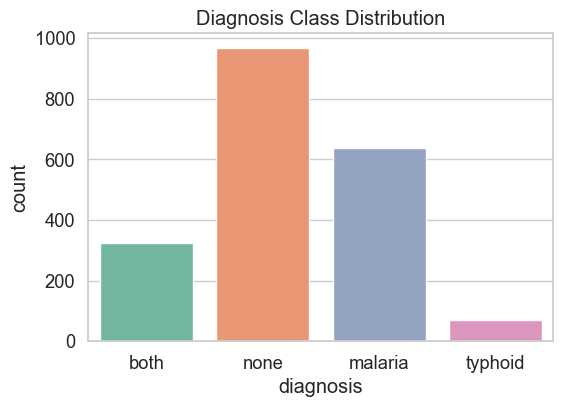

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title('Diagnosis Class Distribution')
plt.show()

## 1.4. Visualize Feature Distributions

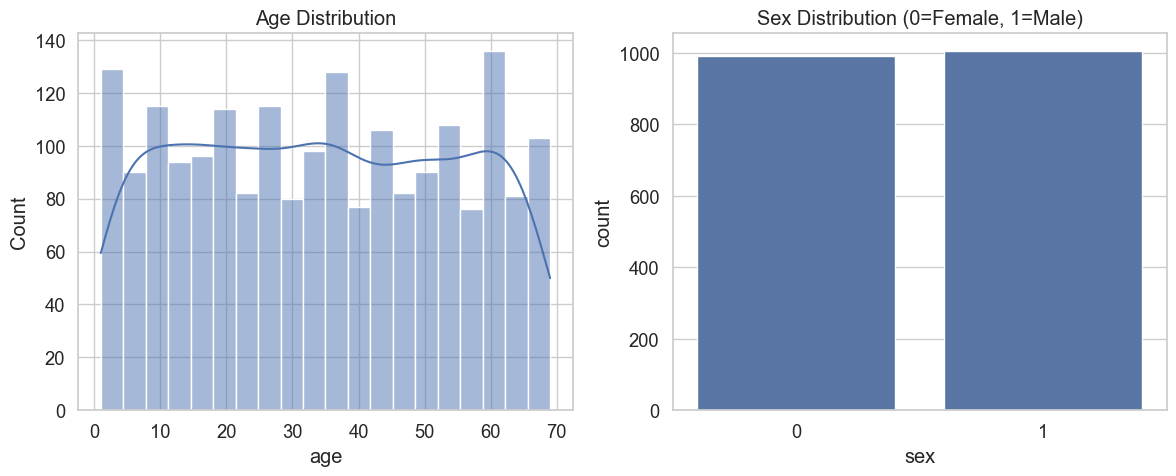

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.countplot(data=df, x='sex', ax=axes[1])
axes[1].set_title('Sex Distribution (0=Female, 1=Male)')
plt.tight_layout()
plt.show()

## 1.5. Symptoms by Diagnosis

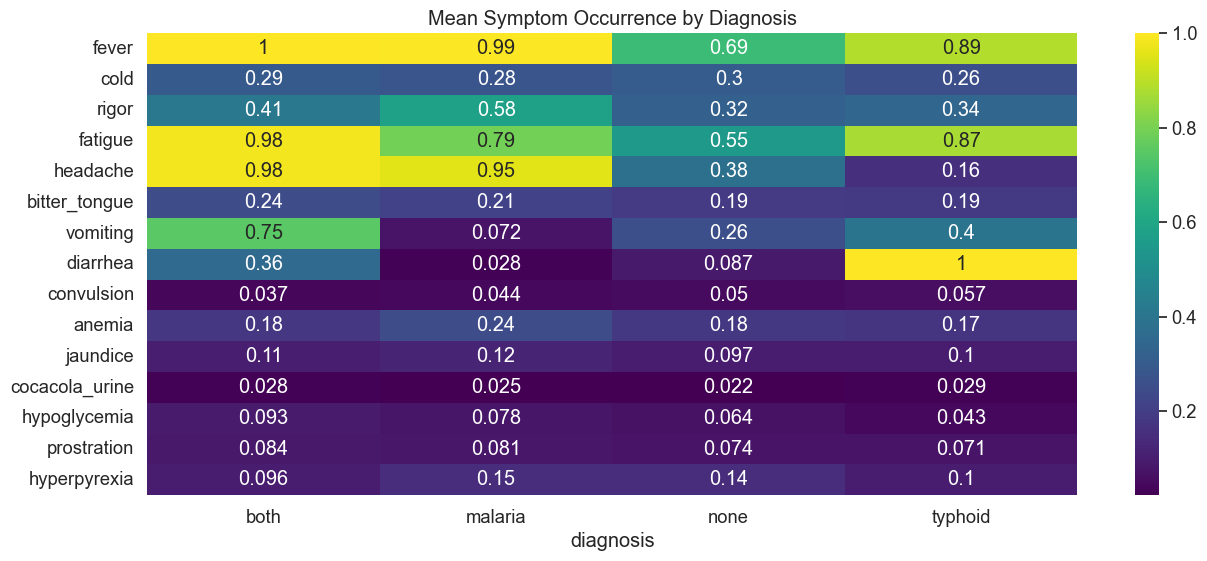

In [8]:
symptoms = [col for col in df.columns if col not in ['age', 'sex', 'diagnosis']]
plt.figure(figsize=(15,6))
sns.heatmap(df.groupby('diagnosis')[symptoms].mean().T, annot=True, cmap='viridis')
plt.title("Mean Symptom Occurrence by Diagnosis")
plt.show()

## 1.6. Correlation Analysis

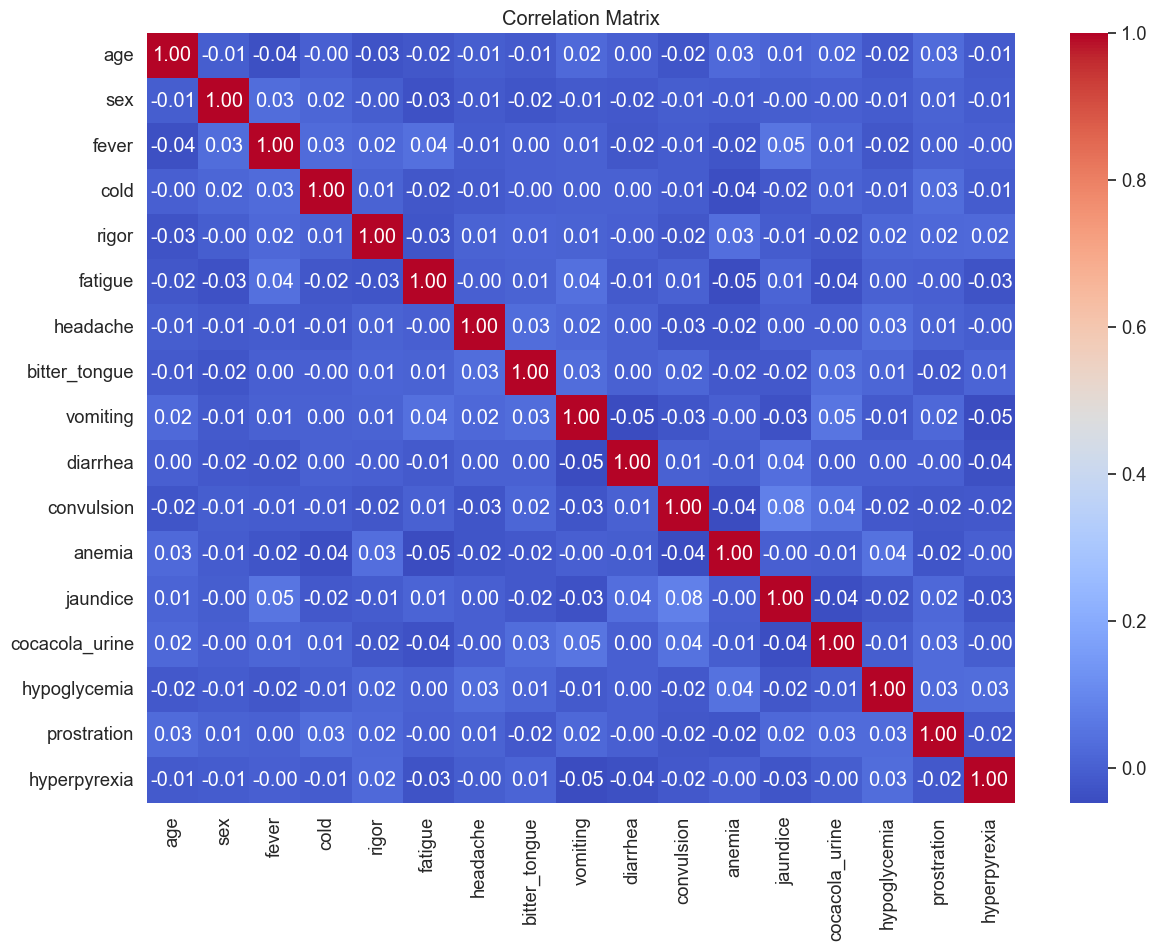

In [9]:
plt.figure(figsize=(14,10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 1.7. Outlier Detection (Boxplots)

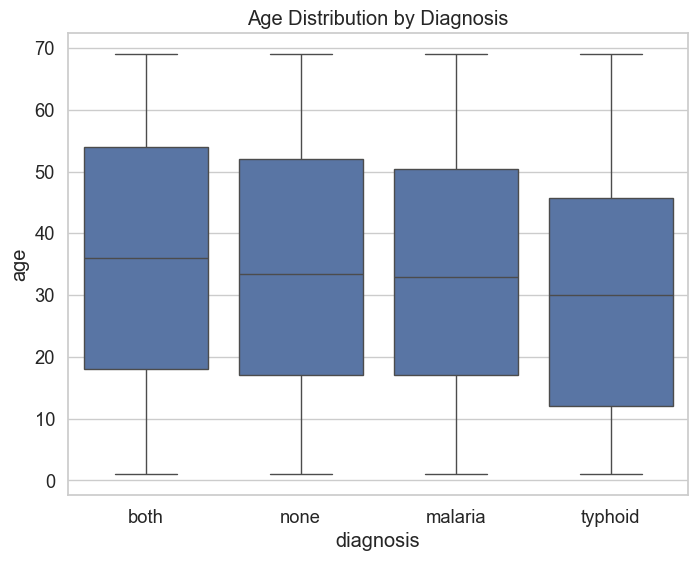

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='diagnosis', y='age')
plt.title('Age Distribution by Diagnosis')
plt.show()

## 1.8. Statistical Testing

In [11]:
from scipy.stats import chi2_contingency

print("Chi-squared test p-values (symptom vs diagnosis):\n")
for col in symptoms:
    crosstab = pd.crosstab(df[col], df['diagnosis'])
    _, p, _, _ = chi2_contingency(crosstab)
    print(f"{col}: p-value = {p:.4f}")

Chi-squared test p-values (symptom vs diagnosis):

fever: p-value = 0.0000
cold: p-value = 0.6243
rigor: p-value = 0.0000
fatigue: p-value = 0.0000
headache: p-value = 0.0000
bitter_tongue: p-value = 0.2386
vomiting: p-value = 0.0000
diarrhea: p-value = 0.0000
convulsion: p-value = 0.7705
anemia: p-value = 0.0106
jaundice: p-value = 0.5792
cocacola_urine: p-value = 0.9150
hypoglycemia: p-value = 0.2356
prostration: p-value = 0.9276
hyperpyrexia: p-value = 0.0979
